In [1]:
import pandas as pd
from janitor import clean_names
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_excel('practica2.xlsx')
df

,ADECUACIÓN COLECCIÓN,ESTADO MATERIAL,ORGANIZACIÓN,ORDENACIÓN,TRATO,INFORMACIÓN.1,HORARIO,WIFI.1,ESTADO,LIMPIEZA,<5 CAUSA,VALORACION GLOBAL
0,8,8,8,8,9,8,8,7,8,8,NaN,9
1,NaN,10,9,10,10,NaN,8,NaN,9,9,NaN,9
2,8,10,7,7,10,7,8,8,8,8,NaN,7
3,9,8,8,9,10,10,5,5,7,10,NaN,9
4,8,9,8,9,9,9,NaN,NaN,9,9,NaN,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1107,10,9,10,10,8,10,7,NaN,10,10,NaN,8
1108,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,9,9,Calefacción alta y refrigeración pobre en varano,7
1109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
1110,6,5,8,8,6,7,6,3,No uso,0,La BPM Vicálvaro necesita una reforma de calad...,5


In [3]:
df = (clean_names(df)
      .dropna(subset = 'valoracion_global'))
df = df.replace(['No uso','no',' ','1o'],np.NaN)
df['id']=df.index
dfnum = df.drop(['<5_causa'],axis = 1).astype('float')

In [4]:
dfCat = df[['<5_causa']].astype('string')
dfCat['id'] = df['id']
nanval = dfCat.loc[0].copy()
nanval[0]


<NA>

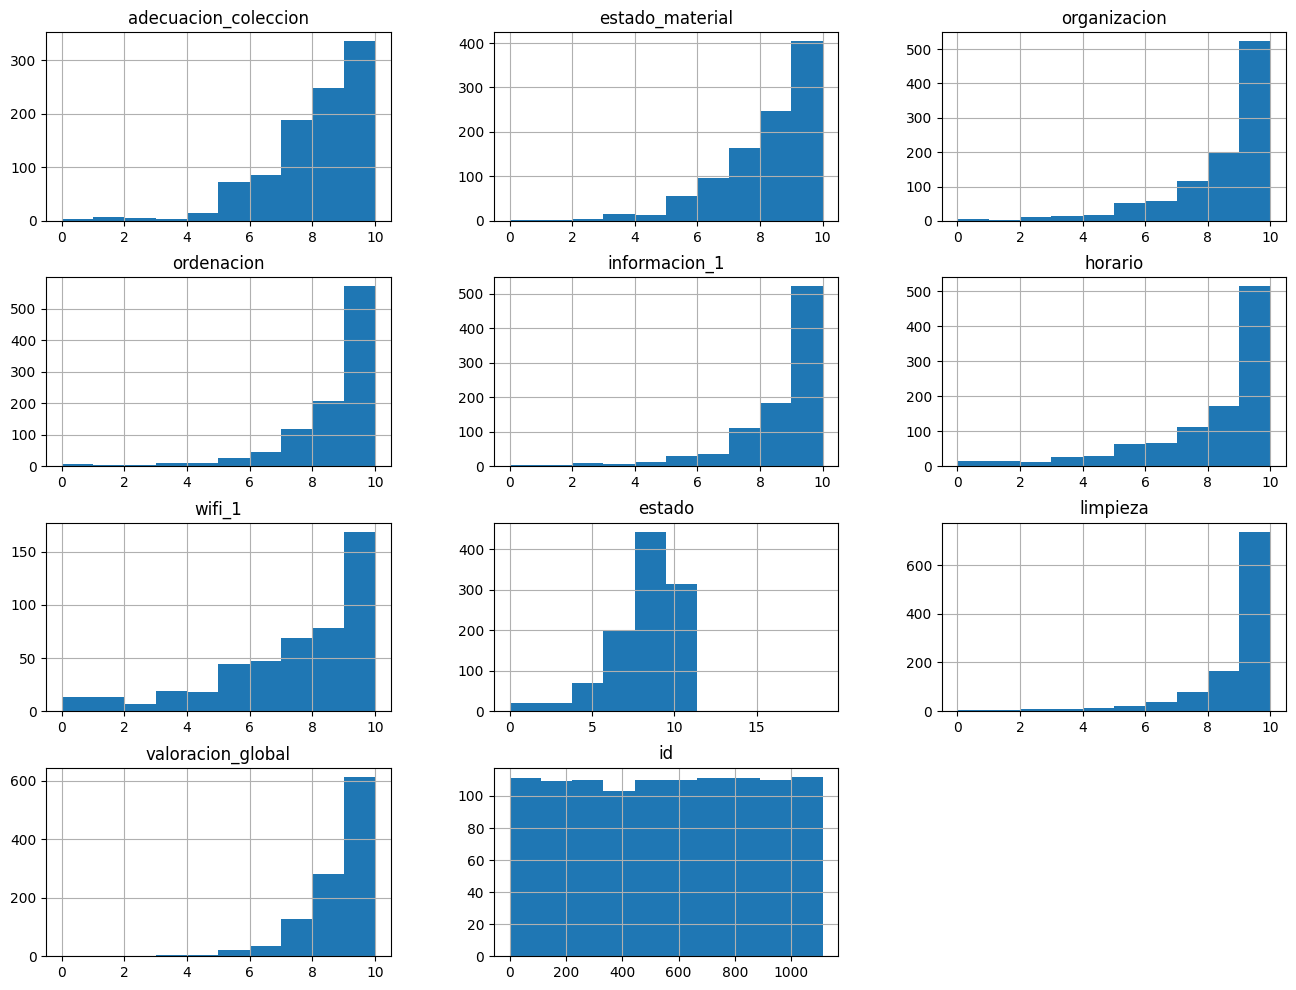

In [5]:
plots = df.hist(figsize = (16,12))

In [6]:
dfCat = dfCat.dropna()
dfCat

,<5_causa,id
5,Hace mucho calor en la sala de lectura y entra...,5
7,Unos días hace mucho frio y no se puede estar ...,7
8,Cuando ponen la calefación hace mucho calor y ...,8
10,"Hace demasiado calor en invierno y verano, imp...",10
16,Temperatura en la sala de estudio excesivament...,16
...,...,...
1096,Ahora no está puesto el aire (en verano).,1096
1099,Me gustaría que el horario de tarde se amplias...,1099
1100,Más refrigeración en algunos días calurosos.,1100
1108,Calefacción alta y refrigeración pobre en varano,1108


In [7]:
vectorizer = TfidfVectorizer(
      lowercase=True,
      stop_words=stopwords.words("spanish"),
      ngram_range=(2, 2))
vectorizer

TfidfVectorizer(ngram_range=(2, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [8]:
vectorizer.fit(dfCat['<5_causa'])


TfidfVectorizer(ngram_range=(2, 2),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [9]:
X = vectorizer.transform(dfCat['<5_causa'])
X

<202x1528 sparse matrix of type '<class 'numpy.float64'>'
	with 1675 stored elements in Compressed Sparse Row format>

In [10]:
tfidf = pd.DataFrame(data = X.toarray(),
                     columns=vectorizer.get_feature_names_out(),
                     index=dfCat['id'])

tfidf


,10 debido,10 experiencia,19 hace,2007 cáceres,27 28,28 dificulta,2ª planta,30 días,abiertas funciona,abiertas pesar,...,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,ángel bibliotecarios,época refrigeración
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
tfidf

,10 debido,10 experiencia,19 hace,2007 cáceres,27 28,28 dificulta,2ª planta,30 días,abiertas funciona,abiertas pesar,...,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,ángel bibliotecarios,época refrigeración
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
saved = pd.DataFrame(tfidf.sum(axis=0),columns=['sum']).sort_values(by = 'sum',ascending=False)
saved

,sum
hace calor,6.352718
calor verano,3.962862
hace frio,3.703858
demasiado calor,3.688565
nunca funciona,3.159546
...,...
pequeña sala,0.121874
pasillos muchas,0.121874
obstáculos personas,0.121874
desenvolverse unas,0.121874


In [13]:
cs = saved['sum'].cumsum()
csplot = cs.loc[cs < saved['sum'].sum()*0.80]
csplot

hace calor                 6.352718
calor verano              10.315580
hace frio                 14.019438
demasiado calor           17.708003
nunca funciona            20.867550
                            ...    
editorial parece         396.144804
si caben                 396.344804
balda siguen             396.544804
enormemente ubicación    396.744804
quepan estantería        396.944804
Name: sum, Length: 908, dtype: float64

In [16]:
final_words = list(csplot.index)
final_words.append('id')
final_words

['hace calor',
 'calor verano',
 'hace frio',
 'demasiado calor',
 'nunca funciona',
 'calor invierno',
 'sala lectura',
 'calor frío',
 'aire acondicionado',
 'sala estudio',
 'frio invierno',
 'frio calor',
 'invierno calor',
 'podría mejorar',
 'hace demasiado',
 'funciona climatización',
 'funciona aire',
 'calor siempre',
 'funciona bien',
 'mala iluminación',
 'invierno hace',
 'frío invierno',
 'acondicionado hace',
 'wifi falla',
 'falta luz',
 'préstamo intercentros',
 'invierno verano',
 'sistema funciona',
 'utilizo internet',
 'climatización deficiente',
 'funciona calefacción',
 'biblioteca refrescada',
 'falla wifi',
 'vino pandemia',
 'luz pésima',
 'ventilación natural',
 'sistema refrigeración',
 'servicio autopréstamo',
 'varias veces',
 'frío verano',
 'hace muchísimo',
 'muchísimo calor',
 'funciona peor',
 'falta iluminación',
 'poca luz',
 'calor enseguida',
 'hace frío',
 'calefacción alta',
 'abrigo puesto',
 'abrir ventanas',
 'calor ocasiones',
 'verano tardes

In [17]:
tfidf = tfidf[tfidf.columns.intersection(final_words)]


In [18]:
tfidf

,10 experiencia,19 hace,2007 cáceres,2ª planta,30 días,abiertas funciona,abiertas ventanas,abra fines,abrigo puesto,abrir horario,...,web complicada,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,época refrigeración
id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
finaldf = dfnum.copy()
finaldf.merge(tfidf,"left",on='id')

,adecuacion_coleccion,estado_material,organizacion,ordenacion,trato,informacion_1,horario,wifi_1,estado,limpieza,...,web complicada,web renovaba,web resulta,wifi capada,wifi desconecta,wifi falla,wifi pésima,wifi va,wifi vuelto,época refrigeración
0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,7.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,10.0,9.0,10.0,10.0,NaN,8.0,NaN,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.0,10.0,7.0,7.0,10.0,7.0,8.0,8.0,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,8.0,8.0,9.0,10.0,10.0,5.0,5.0,7.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,9.0,8.0,9.0,9.0,9.0,NaN,NaN,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,10.0,9.0,10.0,10.0,8.0,10.0,7.0,NaN,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,9.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,6.0,5.0,8.0,8.0,6.0,7.0,6.0,3.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
